<a href="https://colab.research.google.com/github/SanghunOh/study_machinglearning/blob/main/codes/yanginsuk/EM_GaussianMix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 가우시안 확률분포 모델
: 하나의 클래스 혹은 관찰된 전체 데이터 집합이 평균을 중심으로 하여 뭉처져있는  분포 형태를 표현하는데 적합한 확률모델



> 문제점 : 기본적으로 데이터들이 평균을 중심으로 하나의 그룹으로 뭉쳐있는 유니모달(unimodal) 형태를 가진다는것을 가정하고 있어서 복잡한 형태를 가지는 데이터의 확률밀도 함수를 표현하기 힘들다


> 해결책 : 복잡한 데이터 분포를 추정하기 위해서 여러개의 가우시안 을 합하여 만들어지는 가우시안 혼합모델을 사용

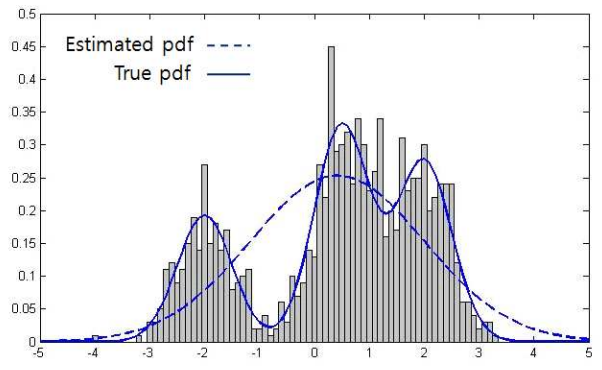

# 최우추정법

-  가우시안 혼합모델에서의 학습이란 데이터를 이용하여 파라미터를 추정하는것을 의미
- 특정 확률모델을 가정하고 그 파라미터를 추정함으로써 확률밀도함수를 얻어내는것 => 모수적 확률밀도 추정방법

** 문제점
: 단순 계산이 어렵다

** 해결책 : 은닉변수를 가진 확률 모델을 위한 EM 알고리즘




일반적으로 GMM은 주어진 데이터 X={x1,x2,...,xN}에 대해 EM 알고리즘을 적용하여 GMM을 구성하는 parameter인 π,μ,Σ를 추정한다. Parameter를 추정하기 위해 아래와 같이 log-likelihood L(X;θ)를 정의한다.

# EM알고리즘을 이용한 GMM파라미터 최적화
앞선 파트에서 계산한 모든 파라미터들의 해는 나머지 값들이 고정되어 있을 때 구할 수 있다. 그러므로 여러해를 동시에 구하기 위해서는 EM알고리즘이라는 단순하고 반복적인 방식을 취할 수 있다.

일단 모든 파라미터를 초기화한다.
- E step: 초기 파라미터를 고정해두고 responsibility(책임값)을 구한다.
- M step: 현재 responsibility을 앞서 구한 MLE solution(세가지 파라미터의 해)에 대입하여 업데이트한다.
log likelihood로 평가한다.

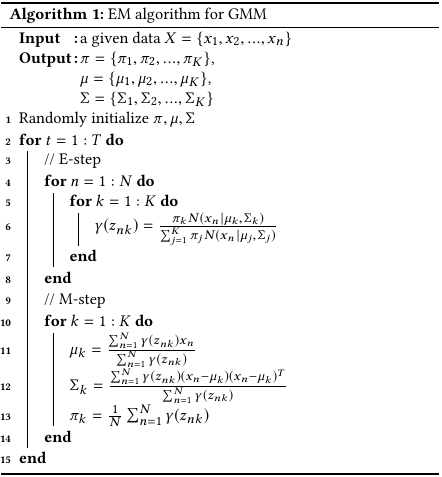

아래의 그림 K=2일때, EM알고리즘 적용을 나타낸다. 여기서 동그라미 두개는 두 가우시안의 단위표준편차 경로이고,

초록색 점들이 빨강,파랑으로 점점 칠해지는것은 확률 값을 기준으로 칠한 것이다.

b)는 Estep을 나타내고 (확률(책임값) 계산)

c)는 Mstep을 나타낸다. (평균이 옮겨감)

이를 20사이클 반복한 것이 f)이다. 여기서 알고리즘이 거의 수렴한 것을 살펴볼 수 있다.
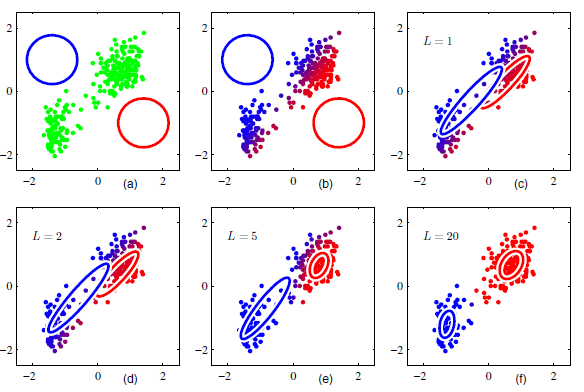

In [43]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [44]:
import scipy.io
mat = scipy.io.loadmat('/content/gdrive/My Drive/MyColab/Data/data10_2.mat')

In [45]:
X=mat.get('data')       # 데이터 로드
X=X.T


In [46]:
def gausspdf(X, mu, sigma):
  n = X.shape[0]    # 입력 벡터의 차원
  N = X.shape[1]    # 데이터의 수
  Mu = np.matlib.repmat(np.reshape(mu,(-1,1)),1,N)  # 행렬 연산을 위한 준비
  # 확률 밀도값 계산
  res = (1 / ((np.sqrt(2*np.pi))**n * np.sqrt(np.linalg.det(sigma)))) \
        * np.exp(-np.diag((X-Mu).T @ np.linalg.inv(sigma) @(X-Mu)) / 2)
  #print(np.exp(1))
  return res

In [47]:
import matplotlib.pyplot as plt
import tensorflow as tf
import math

def drawgraph(X, Mu, Sigma, cnt):
  M=Mu[:,1].size
  
  plt.figure(num=cnt)     #데이터 그리기
  plt.title(cnt)          #check point
  plt.plot(X[0,:], X[1,:], marker='*', linestyle='None')
  plt.axis([-0.5, 5.5, -0.5, 3.5])
  plt.plot(Mu[:,0], Mu[:,1], marker='o', linestyle='None')  #평균 파라미터 그리기
  #print("M=",M)
  for j in range(M):
    #공분산에 따른 타원 그리기
    sigma = np.asarray(np.reshape(Sigma[j,:,:],(2,2)))
    #print("sigma=",sigma)
    t=np.arange(-math.pi,math.pi,0.1)
    A=math.sqrt(2)*np.asarray([np.cos(t), np.sin(t)]).T.dot(scipy.linalg.sqrtm(sigma))+ np.matlib.repmat(Mu[j,:],t.size,1)
    plt.plot(A[:,0], A[:,1], marker='^', linestyle='None')
  plt.show()

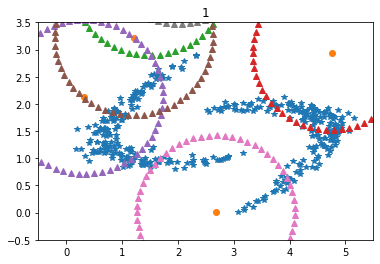

In [48]:
import numpy as np
import tensorflow as tf
N = X.shape[1]                              # 데이터의 수
M = 6                                       # 가우시안 성분의 수
Mu = np.random.rand(M,2)*5                  # 파라메터 설정
Sigma = np.zeros([6,2,2])
for i in range(M):                          #파라미터 초기화(평균)
  Sigma[i,:,:] = [[1,0],[0,1]]
alpha = (np.zeros([6,1])+1)/6               # 파라미터 초기화(혼합계수)

drawgraph(X,Mu, Sigma,1);                   # 그래프 그리기 함수 호출

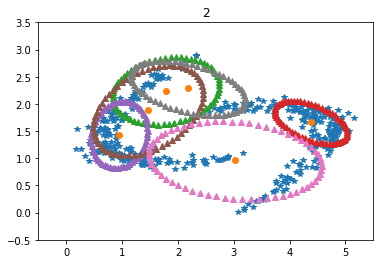

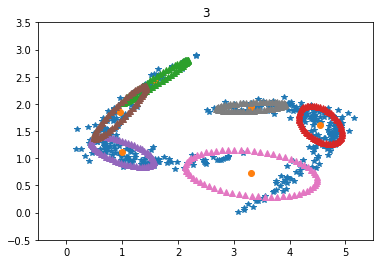

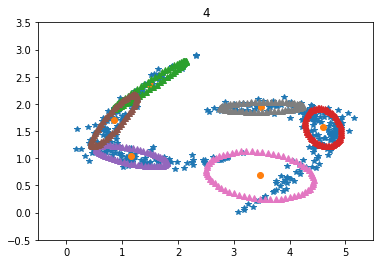

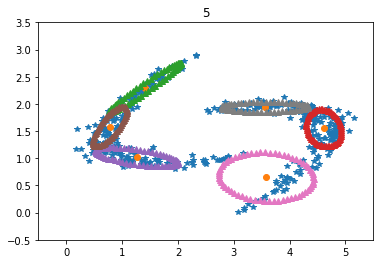

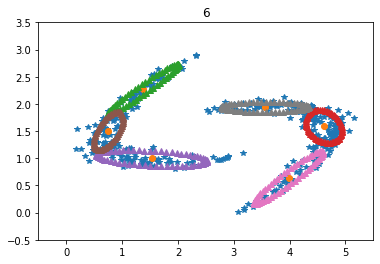

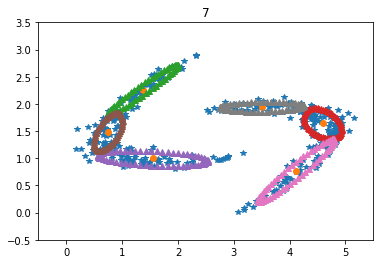

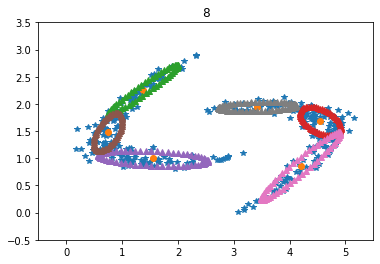

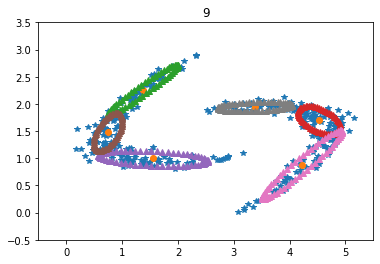

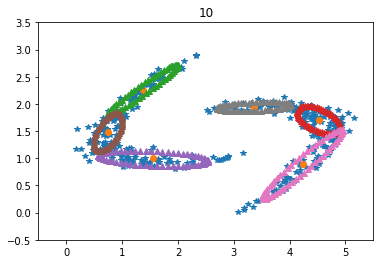

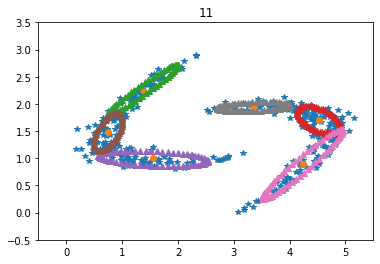

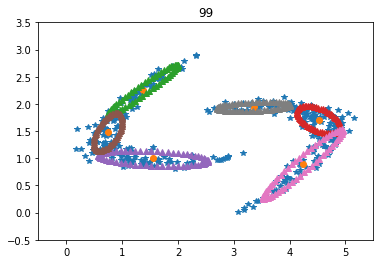

Text(0, 0.5, 'Log-likelihood')

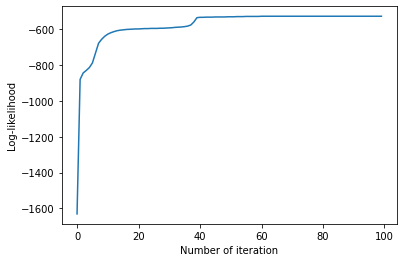

In [49]:
Maxtau = 100          # 최대 반복횟수 설정
px = np.zeros([M,N]) #(6*400)
r = np.empty([N,M]) #(400*6)
L = np.arange(0,100)

for tau in range(Maxtau):
  # E-step : M 번째 반복단계에서 주어진 파라미터를 이용하여 기대치를 계산한다.
  for j in range(M):                  #p 계산
    px[j,:] = gausspdf(X, Mu[j,:], np.reshape(Sigma[j,:,:],(2,2)))
  sump=px.T @ alpha                   #알파, p 계산
  for j in range(M):                  # r 계산
    r[:,j] = np.reshape((np.reshape((alpha[j] * px[j,:]),(-1,1)) / sump),(-1));
  L[tau] = sum(np.log(sump))                  # 현재 파라미터의 로그우도 계산
  #print(L[tau])
  #M-Step : E-step 에서 얻어진 기대치를 이용하여 파라미터를 계산한다.
  for j in range(M):
    sumr=sum(r[:,j])                                        #r의 성분별 합산
    Rj = np.matlib.repmat(r[:,j],2,1)                       #행렬계산을 위한 준비
    Mu[j,:] = np.sum(Rj * X, axis=1) / sumr                 # 새로운 평균
    # 새로운 공분산 계산
    rxmu = (X - np.matlib.repmat(Mu[j,:],N,1).T) * Rj
    Sigma[j,:,:] = rxmu @ \
                  (X - np.matlib.repmat(Mu[j,:],N,1).T).T / sumr
    alpha[j] = sumr/N                                       # 새로운 혼합계수
  if (np.mod(tau, 10) == 1):                                # 그래프 그리기 함수 호출
    drawgraph(X, Mu, Sigma, int(np.ceil(tau/10)+1))

drawgraph(X, Mu, Sigma, tau)                                # 그래프 그리기 함수 호출
plt.plot(L)                                                 # 로그우도의 변환 그래프
plt.xlabel("Number of iteration")
plt.ylabel("Log-likelihood")